In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Train Dataset

In [4]:
data = pd.read_csv(r"C:\Users\HP\Downloads\train_LZdllcl.csv")

In [5]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
data.shape

(54808, 14)

In [8]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
data['education'].fillna(data['education'].mode()[0],inplace = True)
data['previous_year_rating'].fillna(data['previous_year_rating'].median(),inplace=True)

In [10]:
data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [11]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
categ_feature = [feature for feature in data.columns if data[feature].dtype=='O']

In [14]:
categ_feature

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [15]:
for feature in categ_feature:
    le = LabelEncoder()
    data[feature]=le.fit_transform(data[feature])

In [16]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [17]:
x = data.drop(['employee_id','is_promoted'],axis=1)
y=data['is_promoted']

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['age','previous_year_rating','length_of_service','avg_training_score']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [19]:
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,0.025598,1.395766,0.500460,1,0,-1.075931,0
1,65141,4,14,0,1,0,1,-0.627135,1.395766,-0.437395,0,0,-0.253282,0
2,7513,7,10,0,1,2,1,-0.104948,-0.250651,0.265996,0,0,-1.001145,0
3,2542,7,15,0,1,0,2,0.547785,-1.897069,0.969387,0,0,-1.001145,0
4,48945,8,18,0,1,0,1,1.331064,-0.250651,-0.906322,0,0,0.718939,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,5,0,1,2,1,1.722704,-0.250651,2.610632,0,0,1.092871,0
54804,74592,4,19,2,0,0,1,0.286691,-1.073860,0.031532,0,0,-0.552428,0
54805,13918,0,0,0,1,0,1,-1.018775,1.395766,-0.671858,1,0,1.167657,0
54806,13614,7,33,0,1,2,1,-0.757681,-1.897069,-0.906322,0,0,-1.375077,0


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [21]:
scaled_data = scaler.transform(x)

In [22]:
type(scaled_data)

numpy.ndarray

In [23]:
scaled_data = pd.DataFrame(scaled_data)

In [24]:
type(scaled_data)

pandas.core.frame.DataFrame

In [25]:
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.875,0.939394,1.0,0.0,1.0,0.000000,0.375,1.00,0.194444,1.0,0.0,0.166667
1,0.500,0.424242,0.0,1.0,0.0,0.000000,0.250,1.00,0.083333,0.0,0.0,0.350000
2,0.875,0.303030,0.0,1.0,1.0,0.000000,0.350,0.50,0.166667,0.0,0.0,0.183333
3,0.875,0.454545,0.0,1.0,0.0,0.111111,0.475,0.00,0.250000,0.0,0.0,0.183333
4,1.000,0.545455,0.0,1.0,0.0,0.000000,0.625,0.50,0.027778,0.0,0.0,0.566667
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1.000,0.151515,0.0,1.0,1.0,0.000000,0.700,0.50,0.444444,0.0,0.0,0.650000
54804,0.500,0.575758,1.0,0.0,0.0,0.000000,0.425,0.25,0.138889,0.0,0.0,0.283333
54805,0.000,0.000000,0.0,1.0,0.0,0.000000,0.175,1.00,0.055556,1.0,0.0,0.666667
54806,0.875,1.000000,0.0,1.0,1.0,0.000000,0.225,0.00,0.027778,0.0,0.0,0.100000


In [26]:
scaled_data.columns

RangeIndex(start=0, stop=12, step=1)

In [27]:
scaled_data.columns=['department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?','avg_training_score']

In [28]:
scaled_data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0.875,0.939394,1.0,0.0,1.0,0.000000,0.375,1.00,0.194444,1.0,0.0,0.166667
1,0.500,0.424242,0.0,1.0,0.0,0.000000,0.250,1.00,0.083333,0.0,0.0,0.350000
2,0.875,0.303030,0.0,1.0,1.0,0.000000,0.350,0.50,0.166667,0.0,0.0,0.183333
3,0.875,0.454545,0.0,1.0,0.0,0.111111,0.475,0.00,0.250000,0.0,0.0,0.183333
4,1.000,0.545455,0.0,1.0,0.0,0.000000,0.625,0.50,0.027778,0.0,0.0,0.566667
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1.000,0.151515,0.0,1.0,1.0,0.000000,0.700,0.50,0.444444,0.0,0.0,0.650000
54804,0.500,0.575758,1.0,0.0,0.0,0.000000,0.425,0.25,0.138889,0.0,0.0,0.283333
54805,0.000,0.000000,0.0,1.0,0.0,0.000000,0.175,1.00,0.055556,1.0,0.0,0.666667
54806,0.875,1.000000,0.0,1.0,1.0,0.000000,0.225,0.00,0.027778,0.0,0.0,0.100000


In [29]:
x1 = data.drop('is_promoted',axis=1)
y1 = data['is_promoted']

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train,y_train)
y_pred_rf = rf_cls.predict(x_test)

In [40]:
submission = pd.DataFrame(zip(data['employee_id'],y_pred_rf), columns=['employee_id','is_promoted'])

In [42]:
submission

,employee_id,is_promoted
0,65438,0
1,65141,0
2,7513,0
3,2542,0
4,48945,0
...,...,...
10957,31717,0
10958,13135,0
10959,72329,0
10960,46007,0


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [46]:
print('Accuracy is : ',accuracy_score(y_test,y_pred_rf))
print('Precision is : ',precision_score(y_test,y_pred_rf,average = 'micro'))
print('Recall is : ',recall_score(y_test,y_pred_rf,average='micro'))
print('F1 Score is : ',f1_score(y_test,y_pred_rf,average = 'micro'))
print('confusion matrix is : ',confusion_matrix(y_test,y_pred_rf))

Accuracy is :  0.9356869184455391
Precision is :  0.9356869184455391
Recall is :  0.9356869184455391
F1 Score is :  0.9356869184455391
confusion matrix is :  [[10002    52]
 [  653   255]]


### Test Dataset

In [49]:
df = pd.read_csv(r"C:\Users\HP\Downloads\test_2umaH9m.csv")

In [51]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [55]:
df.shape

(23490, 13)

In [57]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [59]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [61]:
df['education'].fillna(df['education'].mode()[0],inplace = True)
df['previous_year_rating'].fillna(df['previous_year_rating'].median(),inplace=True)

In [63]:
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [65]:
categ_feature2 = [feature for feature in df.columns if df[feature].dtype=='O']

In [67]:
categ_feature2

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [69]:
for feature in categ_feature2:
    le = LabelEncoder()
    df[feature]=le.fit_transform(df[feature])

In [71]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,0,1,2,1,24,3.0,1,1,0,77
1,74430,2,28,0,0,0,1,31,3.0,5,0,0,51
2,72255,7,4,0,1,0,1,31,1.0,4,0,0,47
3,38562,5,11,0,0,0,3,31,2.0,9,0,0,65
4,64486,1,21,0,1,2,1,30,4.0,7,0,0,61


In [73]:
from sklearn.cluster import KMeans

In [75]:
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans = kmeans.fit(df)
    wcss.append(kmeans.inertia_)

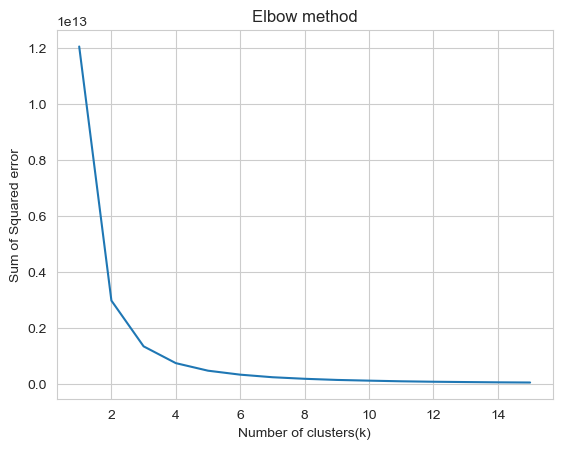

In [76]:
sns.set_style("whitegrid")
g = sns.lineplot(x=range(1,16), y=wcss)

g.set(xlabel = "Number of clusters(k)",
      ylabel = "Sum of Squared error",
     title = "Elbow method")
plt.show()

In [77]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(df)

In [80]:
y_kmeans

array([1, 0, 0, ..., 2, 1, 1])

In [83]:
from sklearn.metrics import silhouette_score
sil_kmeans = silhouette_score(df,y_kmeans)

In [84]:
sil_kmeans

0.5871693552078963

In [85]:
import scipy.cluster.hierarchy as sch

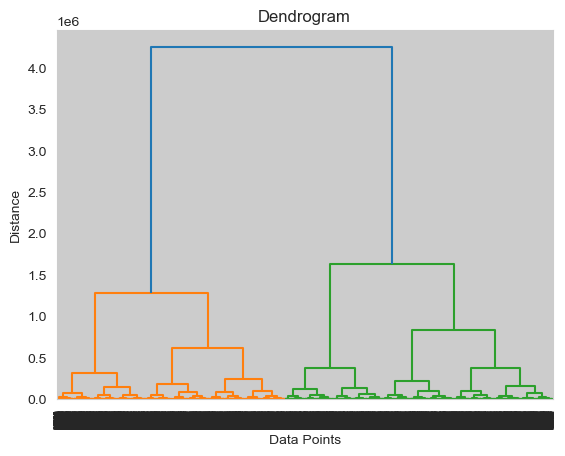

In [86]:
dg = sch.dendrogram(sch.linkage(df,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [87]:
from sklearn.cluster import AgglomerativeClustering

In [93]:
ahc = AgglomerativeClustering(n_clusters = 2,metric = 'euclidean',linkage = 'ward')
y_ahc = ahc.fit_predict(df)

In [94]:
y_ahc

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [95]:
sil_ahc = silhouette_score(df,y_ahc)
sil_ahc 

0.6252696025128558

In [119]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [121]:
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train,y_train)
y_pred_rf = rf_cls.predict(x_test)

In [123]:
sample_submission = pd.DataFrame(zip(df['employee_id'],y_pred_rf), columns=['employee_id','is_promoted'])

In [125]:
sub = pd.read_csv(r"C:\Users\HP\Downloads\sample_submission_M0L0uXE.csv")

In [127]:
sub.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [129]:
sub.isna().sum()

employee_id    0
is_promoted    0
dtype: int64

In [131]:
sub.shape

(23490, 2)

In [133]:
sub['is_promoted']=y_pred_rf

ValueError: Length of values (10962) does not match length of index (23490)

In [107]:
sub.to_csv('sample_submission.csv',index=False)

In [109]:
pd.read_csv(r'submission.csv')

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0
